# Map the locations

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from glob import glob
import pastas as ps
import contextily as ctx

ps.set_log_level("ERROR")

In [6]:
metadata = pd.read_csv("../gw_levels/gwl_metadata.csv")

boreholes = gpd.GeoDataFrame(metadata, geometry=gpd.points_from_xy(metadata.x, metadata.y), crs="epsg:28992")
boreholes = boreholes.to_crs(epsg=3857)

metadata = pd.read_csv("../gw_pumping/abstraction_metadata.csv")

wells = gpd.GeoDataFrame(metadata, geometry=gpd.points_from_xy(metadata.XCoordinate, metadata.YCoordinate), crs="epsg:28992")
wells = wells.to_crs(epsg=3857)

/Applications/anaconda3/envs/py37_pastas/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


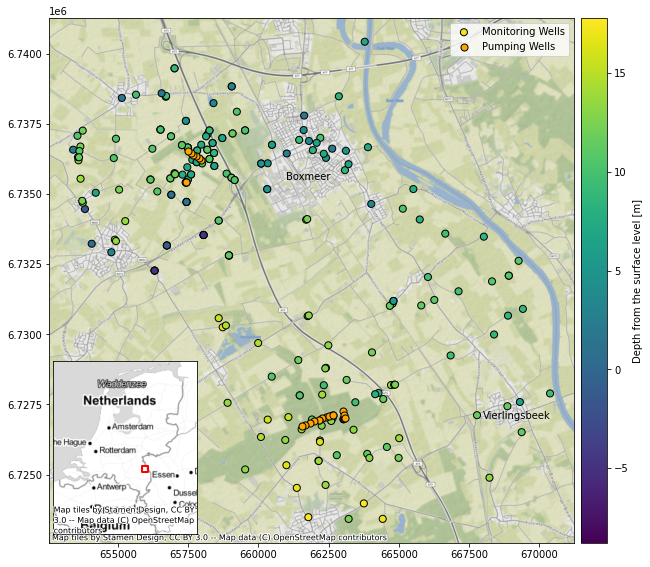

In [107]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
boreholes.plot(column="z", legend=True, ax=ax, cax=cax, linewidth=1, markersize=50, edgecolor='black')
wells.plot(ax=ax, color="orange", linewidth=1, markersize=50, edgecolor='black')
ctx.add_basemap(ax, zoom=14)
ax.legend(["Monitoring Wells", "Pumping Wells"])
cax.set_ylabel("Depth from the surface level [m]") 
ax.text(661000, 6.7355*1e6, s="Boxmeer")
ax.text(668000, 6.7270*1e6, s="Vierlingsbeek")

inmap = plt.axes([0.13, 0.12, 0.2, 0.3])
inmap.set_xticks([])
inmap.set_yticks([])
inmap.scatter(668000, 6.7270*1e6, marker="s", edgecolor='r', linewidth=2, color="")
inmap.set_xlim(3.5e5, 8.5e5)
inmap.set_ylim(6.5e6, 7.1e6)
ctx.add_basemap(inmap, zoom=6, source=ctx.providers.Stamen.TonerLite)